In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
import numpy as np
import seaborn 
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_excel('Preprocessed_AFData.xlsx')

In [4]:
#Split dataset into test and training data
X_train, X_res, y_train, y_res = train_test_split(dataset.iloc[:,0:30], dataset.iloc[:,30], test_size=0.4, random_state = 100)
#Add validation with test size 0.5 (so we split 0.4, 0.2 and 0.2 and random state 42)
X_test, X_val, y_test, y_val = train_test_split(X_res, y_res, test_size=0.5, random_state = 42)


In [5]:
#Transform series to dataframe
y_train_frame = y_train.to_frame()

In [6]:
y_test_frame = y_test.to_frame()

In [15]:
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh = neigh.fit(X_train, y_train)

y_train_pred_neigh = neigh.predict(X_train)
y_test_pred_neigh = neigh.predict(X_test)
y_val_pred_neigh = neigh.predict(X_val)

print('Accuracy Score Training Data = ', accuracy_score(y_train,y_train_pred_neigh))
print('Accuray Score Test Data = ', accuracy_score(y_test,y_test_pred_neigh))
print('Accuray Score Validation Data = ', accuracy_score(y_val,y_val_pred_neigh))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy Score Training Data =  0.9659
Accuray Score Test Data =  0.9386666666666666
Accuray Score Validation Data =  0.9365


In [16]:
label_names = ['Label: 0', 'Label: 1']
print(classification_report(y_val,y_val_pred_neigh, target_names=label_names))


              precision    recall  f1-score   support

    Label: 0       0.94      0.98      0.96     22545
    Label: 1       0.93      0.81      0.86      7455

    accuracy                           0.94     30000
   macro avg       0.93      0.89      0.91     30000
weighted avg       0.94      0.94      0.93     30000



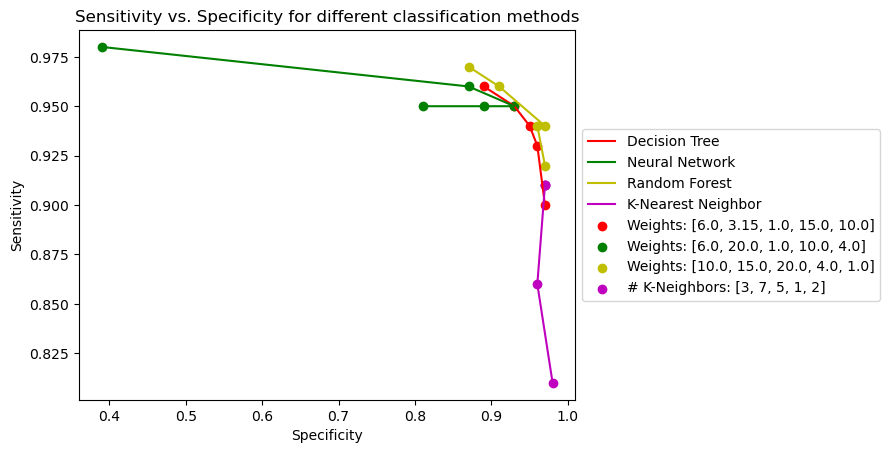

In [25]:
#Sensitivity (SE) and specificity (SP) from trees with different weights assigned to the labels
SE_DT = [0.96, 0.95, 0.94, 0.93, 0.90]
SP_DT = [0.89, 0.93, 0.95, 0.96, 0.97]

SE_NN = [0.95, 0.95, 0.95, 0.96, 0.98]
SP_NN = [0.81, 0.89, 0.93, 0.87, 0.39]

SE_RF = [0.97, 0.96, 0.94, 0.94, 0.92]
SP_RF = [0.87, 0.91, 0.97, 0.96, 0.97]

SE_KNN = [0.91, 0.91, 0.91, 0.86, 0.81]
SP_KNN = [0.97, 0.97, 0.97, 0.96, 0.98]

#labels with weights order as put in the array above
label_plot_DT = {'15.0', '10.0','6.0', '3.15', 'No Weights'} 
label_plot_NN = {'No weights', '4.0', '6.0', '10.0', '20.0'}
label_plot_RF = {'20.0', '15.0', '10.0', '4.0', '1.0'}
label_plot_KNN = {'3' , '7','15', '1','2'}

plt.figure(2)
plt.plot(SP_DT, SE_DT, c='r', label = 'Decision Tree')
plt.plot(SP_NN, SE_NN, c = 'g',  label = 'Neural Network')
plt.plot(SP_RF, SE_RF, c = 'y', label = 'Random Forest')
plt.plot(SP_KNN, SE_KNN, c = 'm', label = 'K-Nearest Neighbor')

plt.scatter(SP_DT, SE_DT, c='r', label='Weights: [6.0, 3.15, 1.0, 15.0, 10.0]')
plt.scatter(SP_NN, SE_NN, c='g', label='Weights: [6.0, 20.0, 1.0, 10.0, 4.0]')
plt.scatter(SP_RF, SE_RF, c= 'y', label ='Weights: [10.0, 15.0, 20.0, 4.0, 1.0]')
plt.scatter(SP_KNN, SE_KNN, c= 'm', label = '# K-Neighbors: [3, 7, 5, 1, 2]')

plt.title('Sensitivity vs. Specificity for different classification methods')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Sensitivityspecificityplot.png')
plt.show()
